In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.spatial.distance import cdist

In [3]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [4]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]

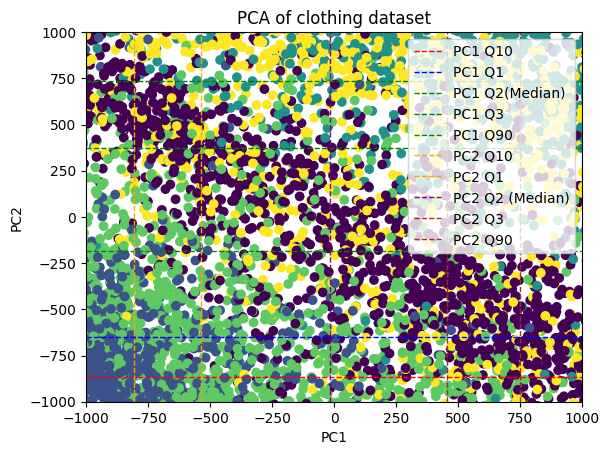

In [5]:

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_train)
pca_transformed_X_train = pca.transform(X_train)

# Set limits for x and y axes
xlim = (-1000, 1000)
ylim = (-1000, 1000)

# Scatter plot of PC1 vs PC2 
plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1], c=y_train, cmap='viridis') #c=y_train[]

# Calculate marginal quantiles for PC1 and PC2 
quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.10, 0.25, 0.5, 0.75, 0.90])
quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.10, 0.25, 0.5, 0.75, 0.90])

# Plotting quantiles on the sides of the scatter plot
plt.axhline(quantiles_pc1[0], color='red', linestyle='--', linewidth=1, label='PC1 Q10')
plt.axhline(quantiles_pc1[1], color='blue', linestyle='--', linewidth=1, label='PC1 Q1')
plt.axhline(quantiles_pc1[2], color='green', linestyle='--', linewidth=1, label='PC1 Q2(Median)')
plt.axhline(quantiles_pc1[3], color='green', linestyle='--', linewidth=1, label='PC1 Q3')
plt.axhline(quantiles_pc1[4], color='green', linestyle='--', linewidth=1, label='PC1 Q90')

plt.axvline(quantiles_pc2[0], color='orange', linestyle='--', linewidth=1, label='PC2 Q10')
plt.axvline(quantiles_pc2[1], color='orange', linestyle='--', linewidth=1, label='PC2 Q1')
plt.axvline(quantiles_pc2[2], color='purple', linestyle='--', linewidth=1, label='PC2 Q2 (Median)')
plt.axvline(quantiles_pc2[3], color='brown', linestyle='--', linewidth=1, label='PC2 Q3')
plt.axvline(quantiles_pc2[4], color='brown', linestyle='--', linewidth=1, label='PC2 Q90')

# Set limits for x and y axes
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of clothing dataset')
plt.legend()

plt.show()


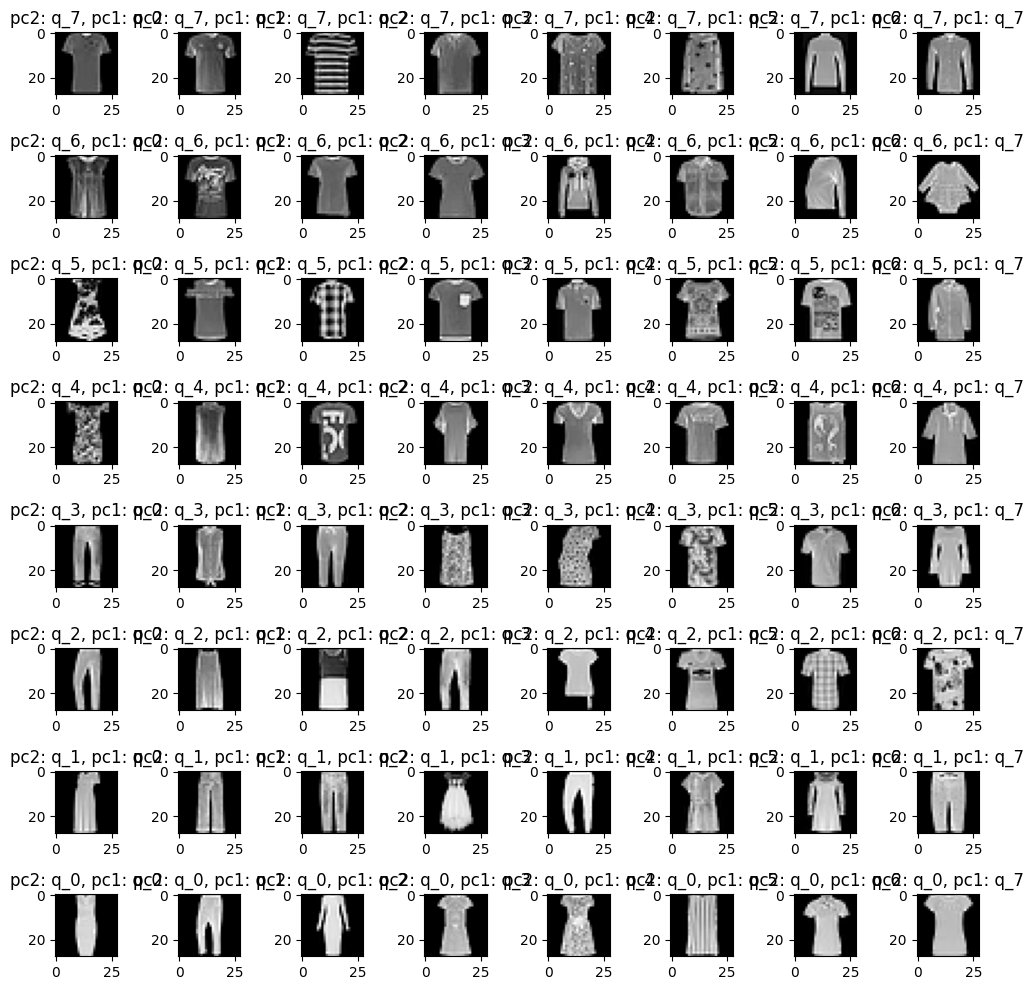

In [10]:
def find_img(pca_X, X, quantiles_pc1, quantiles_pc2):
    #num_images = len(target_coordinates)
    num_cols = len(quantiles_pc1) #3  # Adjust the number of columns in the grid as needed
    num_rows = len(quantiles_pc2) #-(-num_images // num_cols)  # Ceiling division to determine the number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

    for i, q2 in enumerate(quantiles_pc2):
        for j, q1 in enumerate(quantiles_pc1):
            # Calculate Euclidean distances
            distances = np.linalg.norm(pca_X - [q1, q2], axis=1)

            # Find the index of the point with the smallest distance
            closest_point_index = np.argmin(distances)

            # Assuming X_train is your original dataset
            closest_image = X[closest_point_index].reshape(28, 28)

            # Display the image in the subplot
            axes[num_rows-(i+1), j].imshow(closest_image, cmap='gray')
            axes[num_rows-(i+1), j].set_title(f'pc2: q_{i}, pc1: q_{j}')

    plt.tight_layout()
    plt.show()

quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

find_img(pca_transformed_X_train, X_train, quantiles_pc1, quantiles_pc2)
